In [115]:
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
from matplotlib import rcParams
import matplotlib as mpl

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (10, 6),
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## Salary EDA

In [118]:
cap = pd.read_csv('data/salary_cap_history.csv')

players = pd.read_csv('data/finaldata.csv')
players.Year = players.Year.astype('int')
players = players.drop(columns = 'Unnamed: 0')

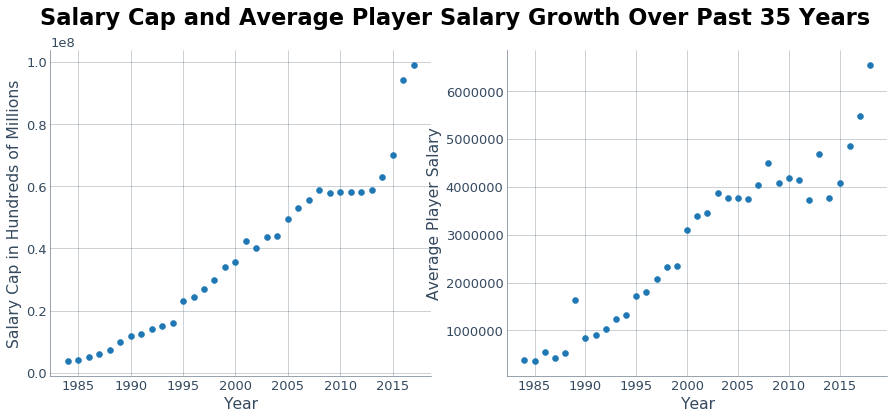

In [119]:
cap_history = cap.salary_cap[0:-3]
average_salary = players.groupby(['Year']).mean().salary

plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

plt.subplot(121)
plt.scatter(x = cap.year[0:-3], y = cap_history)
plt.xlabel('Year')
plt.ylabel('Salary Cap in Hundreds of Millions')

plt.subplot(122)
plt.scatter(x = players.groupby(['Year']).mean().index, y = average_salary)
plt.xlabel('Year')
plt.ylabel('Average Player Salary')
plt.suptitle('Salary Cap and Average Player Salary Growth Over Past 35 Years')
plt.show()

In [120]:
corr = cap_history.corr(average_salary.reset_index().salary)

print('Correlation between league salary cap and average player salary:',round(corr,3))

Correlation between league salary cap and average player salary: 0.898


The correlation here should be of no surprise, but it's important for us to establish that players are not getting paid more because their 'value' is going up, but rather revenue is simply increasing for the league over time.

When we look at the general distribution of salaries over the past 5 years, we see that the majority of players are going to sit at the lower end of the range. However, we'll be more concerned with individuals we've deemed as starter-caliber. Those that have started at least 14 games, so we'll plot that as well. Notice the spread is more even in this second plot.

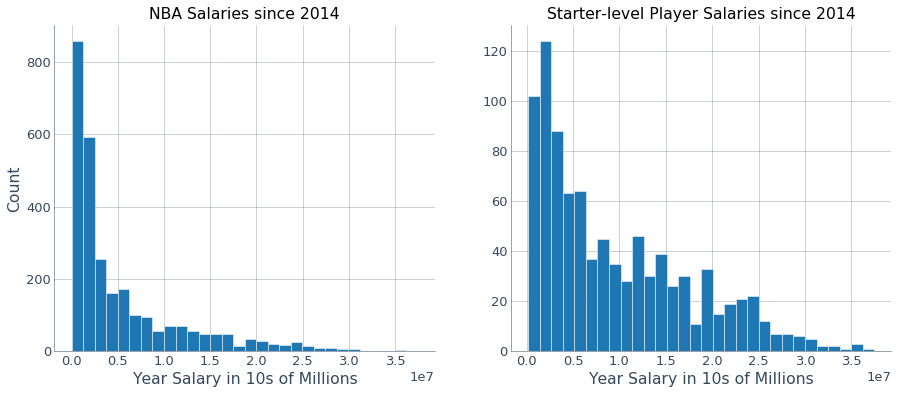

In [132]:
plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

plt.subplot(121)
plt.hist(players.loc[players.Year > 2014,:].salary, bins = 30)
plt.xlabel('Year Salary in 10s of Millions')
plt.ylabel('Count')
plt.title('NBA Salaries since 2014')

plt.subplot(122)
plt.hist(players.loc[(players.Year > 2014)&(players.GS > 14),:].salary, bins = 30)
plt.xlabel('Year Salary in 10s of Millions')
plt.title('Starter-level Player Salaries since 2014')
plt.show()

In [122]:
full = players[players.Year > 1999].drop(['height','weight','shoots'],axis = 1).set_index(['Full Name','Year']).dropna(how = 'all')
full = full.reset_index()

In [123]:
full[full['Full Name']=='Vince Carter'].head(5)

,Full Name,Year,Last Name,First Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,salary,Dist.,2P_A,0-3_A,3-10_A,10-16_A,16-3pt_A,3P_A,0-3%,3-10%,10-16%,16-3pt%,Astd_2P,Dunk%,Dunks_Md,Astd_3P,%Corner3_A,Corner_3P%,Heaves_A,Heaves_Md
115,Vince Carter,2018,Carter,Vince,SF,42.0,ATL,76.0,9.0,1330.0,6.8,16.3,0.419,4.3,11.0,0.389,2.5,5.3,0.480,1.6,2.3,0.712,1.1,5.7,6.7,3.0,1.5,0.9,1.7,4.9,19.5,112.0,115.0,11.8,0.565,0.675,0.141,2.4,13.2,7.7,9.3,1.5,1.8,8.8,16.7,1.2,0.7,1.9,0.070,-0.2,-1.4,-1.6,0.1,2393887.0,19.8,0.325,0.147,0.071,0.064,0.043,0.675,0.623,0.273,0.467,0.350,0.589,0.036,15.0,0.911,0.152,0.458,3.0,0.0
824,Vince Carter,2017,Carter,Vince,SF,41.0,SAC,58.0,5.0,1026.0,5.6,14.0,0.403,2.8,8.1,0.345,2.8,5.8,0.483,1.4,1.8,0.757,0.9,6.4,7.3,3.4,2.1,1.3,1.8,4.7,15.4,103.0,110.0,10.8,0.523,0.583,0.131,1.9,15.1,8.2,9.7,2.1,2.4,10.7,14.7,0.3,0.9,1.2,0.056,-1.5,0.4,-1.1,0.2,8000000.0,18.2,0.417,0.170,0.092,0.042,0.113,0.583,0.583,0.308,0.583,0.438,0.474,0.039,10.0,0.982,0.145,0.292,2.0,0.0
1562,Vince Carter,2016,Carter,Vince,SF,40.0,MEM,73.0,15.0,1799.0,5.6,14.2,0.394,3.2,8.6,0.378,2.3,5.6,0.418,2.5,3.3,0.765,1.0,5.5,6.6,3.8,1.7,1.0,1.4,4.7,16.9,112.0,108.0,11.7,0.542,0.604,0.235,2.2,12.5,7.2,11.5,1.7,1.9,8.5,14.9,1.9,2.1,4.0,0.106,0.1,0.9,1.0,1.4,4264057.0,18.4,0.396,0.182,0.092,0.047,0.076,0.604,0.483,0.444,0.174,0.378,0.432,0.022,10.0,0.875,0.193,0.351,2.0,0.0
2231,Vince Carter,2015,Carter,Vince,SG,39.0,MEM,60.0,3.0,1005.0,6.8,17.6,0.388,3.0,8.7,0.349,3.8,8.9,0.425,3.6,4.3,0.833,1.6,5.9,7.5,2.9,1.9,0.8,1.8,5.2,20.2,107.0,108.0,12.7,0.520,0.493,0.245,3.4,13.6,8.3,8.9,1.9,1.5,8.4,18.5,1.0,0.8,1.8,0.084,-0.1,-1.2,-1.2,0.2,4088091.0,16.9,0.507,0.207,0.093,0.073,0.134,0.493,0.535,0.313,0.360,0.370,0.500,0.052,16.0,0.864,0.172,0.345,4.0,2.0
2912,Vince Carter,2014,Carter,Vince,SG,38.0,MEM,66.0,1.0,1091.0,6.5,19.4,0.333,3.3,11.1,0.297,3.2,8.3,0.379,2.2,2.7,0.789,1.3,5.1,6.4,3.8,2.1,0.7,2.1,4.9,18.4,94.0,103.0,9.6,0.445,0.571,0.140,2.8,11.1,7.0,11.1,2.1,1.1,9.1,19.9,-0.5,1.4,1.0,0.043,-1.1,-0.3,-1.4,0.2,3911981.0,19.3,0.429,0.131,0.074,0.067,0.158,0.571,0.472,0.333,0.407,0.313,0.242,0.012,5.0,0.928,0.138,0.375,2.0,0.0


Our first efforts to determine value will be to scan correlates of salary. Below are the features with the strongest correlation to salary based on the data from the past 20 years. While none of these correlation coefficients (r) are especially strong (strong being 0.7 or higher as a rule of thumb), the first few are important features to understand.

**PER**, or 'Player Efficiency Rating' is an advanced statistic of per-minute production standardized such that the league average is 15. More information on how PER is calculated can be found <a href="https://www.basketball-reference.com/about/per.html">here.</a><br>
**WS**, or 'Win-Share' is another advanced statistic of estimated wins contributed by a player as a sum of OWS and DWS, or Offensive Win-Share and Defensive Win-Share, respectively. More information on the calculation for Win Share can be found <a href="https://www.basketball-reference.com/about/ws.html">here.</a><br>
**VORP**, or 'Value Over Replacement Player' is a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.<br>
**BPM**, or 'Box Plus/Minus' is a box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team. More on BPM can be found <a href="https://www.basketball-reference.com/about/bpm.html">here.</a><br>
**GS**, **PTS**, and **FG**: 'Games Started', 'Points Scored', and 'Successful Field Goals', respectively<br><br>
The advanced statistics here are especially interesting to us because of their natures as composites of many elements of a players contributions. So, while it should be encouraging to team general managers that their money is being appropriately in one sense (the appropriate metrics correlating strongest with salary), the fact that the correlations are so weak across the board should be troubling. What are players getting paid for?

In [124]:
print('Correlates of salary:')

full.corr().loc[:,'salary'].sort_values(ascending = False)[:10]

Correlates of salary:


salary    1.000000
WS        0.488116
GS        0.478020
VORP      0.464952
MP        0.450587
OWS       0.445977
DWS       0.444932
PTS       0.369006
BPM       0.363273
PER       0.360127
Name: salary, dtype: float64

We will want to look at players in the context of similar players, so we import in our player labels and merge it with our data. Review 'Player Career LDA.ipynb' to see how we developed our new, more robust position labeling. Below is our new pandas DataFrame, from which we can do our EDA.

In [125]:
labels = pd.read_csv('data/player_labels.csv')
labels = labels.drop(columns = 'Pos')

df = pd.merge(labels, full, on = 'Full Name')
#df = df.drop(1)

df.to_csv('data/labeled_seasons.csv')
df.sort_values('3P%',ascending = False).head()
#df.sort_values('BPM', ascending = False).head()

,Full Name,cluster,Year,Last Name,First Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,salary,Dist.,2P_A,0-3_A,3-10_A,10-16_A,16-3pt_A,3P_A,0-3%,3-10%,10-16%,16-3pt%,Astd_2P,Dunk%,Dunks_Md,Astd_3P,%Corner3_A,Corner_3P%,Heaves_A,Heaves_Md
7249,Anthony Mason,Versatile Forward,2001,Mason,Anthony,PF,35.0,MIL,82.0,82.0,3143.0,5.3,10.6,0.505,0.0,0.0,1.0,5.3,10.6,0.504,2.6,3.7,0.697,2.1,8.8,10.9,5.9,1.0,0.4,2.2,3.2,13.3,113.0,108.0,12.9,0.544,0.002,0.353,4.8,18.3,11.9,16.6,1.0,0.5,15.2,12.7,4.4,2.0,6.4,0.097,-0.5,0.8,0.3,1.8,4538000.0,5.9,0.998,0.383,0.337,0.236,0.042,0.002,0.529,0.531,0.419,0.538,0.530,0.005,3.0,1.0,0.0,NaN,0.0,0.0
1425,Enes Kanter,Defensive Center,2012,Kanter,Enes,C,20.0,UTA,70.0,2.0,1078.0,10.1,18.6,0.544,0.0,0.0,1.0,10.0,18.5,0.542,4.6,5.7,0.795,6.6,8.3,14.9,1.5,1.4,1.6,4.9,5.7,24.8,106.0,107.0,17.6,0.588,0.003,0.309,14.5,18.6,16.5,5.0,1.4,2.3,19.0,22.4,1.2,1.0,2.3,0.101,-0.9,-1.2,-2.1,0.0,4443360.0,6.4,0.997,0.485,0.243,0.132,0.137,0.003,0.652,0.446,0.400,0.462,0.537,0.066,24.0,0.0,0.0,NaN,0.0,0.0
5579,Yao Ming*,Defensive Center,2008,Ming*,Yao,C,28.0,HOU,77.0,77.0,2589.0,11.6,21.2,0.548,0.0,0.0,1.0,11.6,21.2,0.548,7.8,9.0,0.866,4.2,11.4,15.6,2.8,0.6,3.1,4.8,5.3,31.1,114.0,101.0,22.7,0.618,0.001,0.426,9.6,24.1,17.1,10.0,0.6,4.2,16.0,26.2,5.6,5.0,10.6,0.196,0.6,2.4,3.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2446,Hassan Whiteside,Defensive Center,2017,Whiteside,Hassan,C,28.0,MIA,54.0,54.0,1364.0,11.5,21.3,0.540,0.1,0.1,1.0,11.4,21.2,0.538,4.7,6.7,0.703,6.4,16.3,22.7,2.0,1.4,3.5,3.4,4.8,27.8,111.0,99.0,24.1,0.573,0.003,0.315,14.3,36.6,25.4,6.9,1.4,5.9,12.3,24.7,2.3,3.0,5.3,0.187,-2.1,2.3,0.2,0.8,23775506.0,5.6,0.997,0.434,0.329,0.151,0.081,0.003,0.713,0.447,0.310,0.404,0.587,0.168,89.0,1.0,0.0,NaN,0.0,0.0
4457,Jason Collins,Versatile Forward,2010,Collins,Jason,C,32.0,ATL,49.0,28.0,593.0,3.1,6.4,0.479,0.1,0.1,1.0,3.0,6.3,0.471,2.4,3.7,0.659,2.7,6.5,9.2,2.0,0.8,0.8,2.4,8.8,8.7,101.0,108.0,5.4,0.539,0.014,0.577,6.1,14.5,10.4,5.3,0.8,1.2,22.6,9.2,0.1,0.5,0.6,0.049,-4.4,0.5,-3.9,-0.3,1352181.0,9.5,0.986,0.380,0.155,0.085,0.366,0.014,0.630,0.273,0.167,0.462,0.848,0.099,6.0,1.0,1.0,1.0,0.0,0.0


Perhaps a player's salary will make more sense against similar players. Now that each player is assigned to a niche, we can look at both how players of a cluster compare as well as how these new clusters compare to one another.

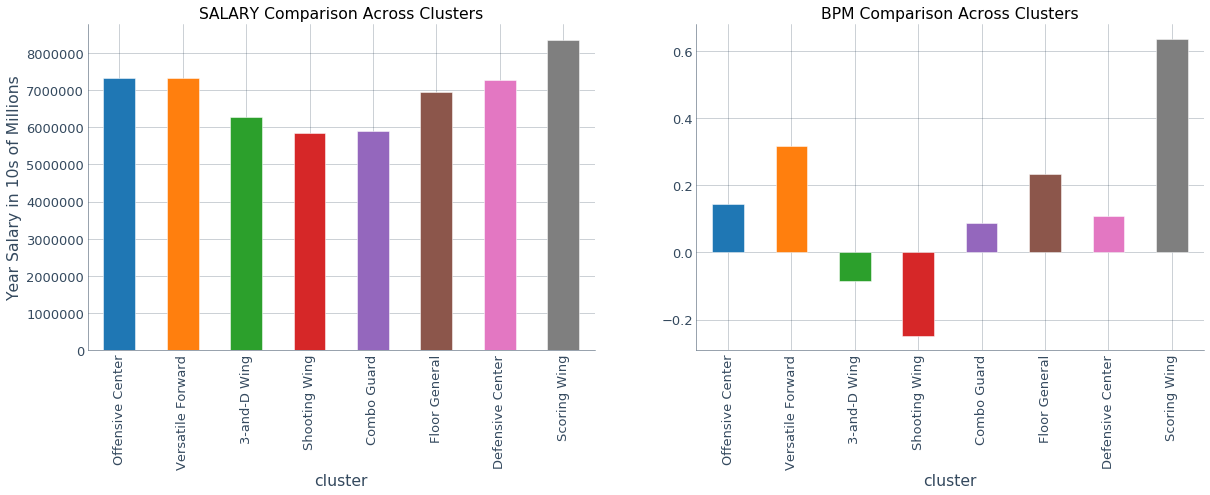

In [126]:
sample = df[(df.GS > 10)&(df.Year > 1999)]

feature = 'salary'

feature2 = 'BPM'

plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

plt.subplot(121)
sample.groupby('cluster', sort = False).mean()[feature].plot(kind = 'bar')
plt.ylabel('Year Salary in 10s of Millions')
plt.title(feature.upper()+' Comparison Across Clusters')

plt.subplot(122)
sample.groupby('cluster', sort = False).mean()[feature2].plot(kind = 'bar')
plt.title(feature2.upper()+' Comparison Across Clusters')
plt.show()

In [127]:
sample[sample.cluster == 'Scoring Wing'].sort_values(feature2, ascending = False)[['Full Name','Year','salary',feature2]].drop_duplicates().head(5)

,Full Name,Year,salary,BPM
1324,LeBron James,2008,14410581.0,13.0
1323,LeBron James,2009,15779912.0,12.5
1032,James Harden,2018,30570000.0,11.7
1320,LeBron James,2012,17545000.0,11.6
1325,LeBron James,2007,13041250.0,11.2


While the above left plot gives us some idea how teams value these positions against each other, such a hierarchy of value has been a fluid one, each year a different cluster being deemed the more valuable. The below line plot demonstrates this as we see average salaries per cluster growing at varying and constantly changing rates.

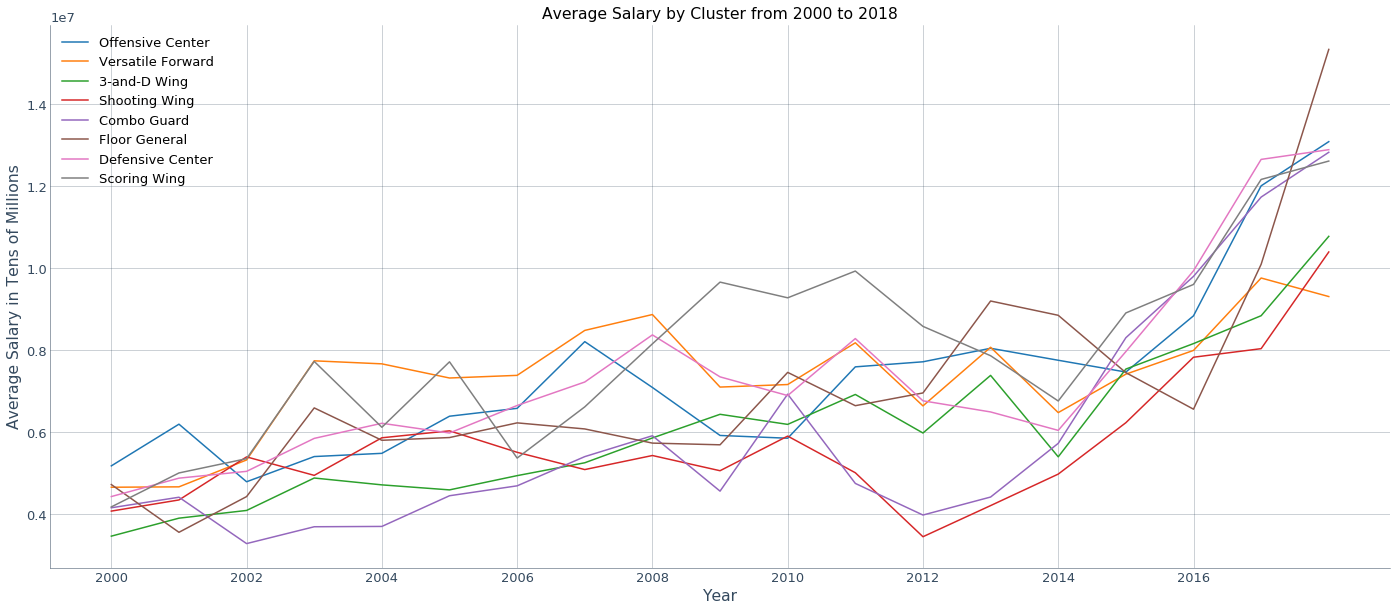

In [128]:
firstyear = 2000
lastyear = 2018

clusters = df.cluster.unique()
years = range(firstyear,lastyear+1)

cluster_salaries_years = []

for i in years:
    salaries_per_year = []
    data = df[(df.Year == i) & (df.GS > 10)]
    for j in clusters:
        avg_salary = data.groupby('cluster').mean().salary.loc[j]
        salaries_per_year.append(avg_salary)
    cluster_salaries_years.append(salaries_per_year)

#############################################################################################    
    
plt.figure(figsize = (24,10))
for c in range(len(clusters)):
    plt.plot(years, [i[c] for i in cluster_salaries_years])

plt.legend(clusters, loc = 'best')
plt.xticks(range(firstyear, lastyear, 2))
plt.xlabel('Year')
plt.ylabel('Average Salary in Tens of Millions')
plt.title('Average Salary by Cluster from {} to {}'.format(firstyear,lastyear))
plt.show()

In [129]:
from lib.Compensation import assessment as assess